In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional, TimeDistributed,GlobalMaxPool1D,Masking
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import json
from sklearn.model_selection import KFold
from keras.regularizers import l1,l2
from keras import regularizers
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/max-labels-intense-selection.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [ ]:
X = ([x[0] for x in data])

y = np.array([x[1] for x in data])


In [ ]:
X = X
Y = y
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
max_words = 10000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def LSTM_():
  inp = Input(shape=[max_len])
  x = Embedding(max_words,50,input_length=max_len)(inp)
  for i in range(0,5):
    x = LSTM(256,return_sequences=True,dropout=0.2,recurrent_dropout=0)(x)
    x = LSTM(256,return_sequences=True,dropout=0.2,recurrent_dropout=0)(x)
    x = Dropout(0.2)(x)
  x = Dense(256, activation="relu")(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  return model

In [ ]:
model = LSTM_()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 150, 50)           500000    
_________________________________________________________________
lstm_50 (LSTM)               (None, 150, 256)          314368    
_________________________________________________________________
lstm_51 (LSTM)               (None, 150, 256)          525312    
_________________________________________________________________
dropout_20 (Dropout)         (None, 150, 256)          0         
_________________________________________________________________
lstm_52 (LSTM)               (None, 150, 256)          525312    
_________________________________________________________________
lstm_53 (LSTM)               (None, 150, 256)        

In [ ]:
history = model.fit(sequences_matrix, Y,validation_split=0.2, batch_size=128, epochs=100)

Epoch 1/100
125/125 [==============================] - 41s 329ms/step - loss: 0.7028 - accuracy: 0.5032 - val_loss: 0.6937 - val_accuracy: 0.4843
Epoch 2/100
125/125 [==============================] - 37s 300ms/step - loss: 0.6946 - accuracy: 0.4996 - val_loss: 0.6939 - val_accuracy: 0.4843
Epoch 3/100
125/125 [==============================] - 38s 302ms/step - loss: 0.6954 - accuracy: 0.5009 - val_loss: 0.6938 - val_accuracy: 0.4843
Epoch 4/100
125/125 [==============================] - 38s 301ms/step - loss: 0.6936 - accuracy: 0.4986 - val_loss: 0.6943 - val_accuracy: 0.4843
Epoch 5/100
125/125 [==============================] - 38s 300ms/step - loss: 0.6933 - accuracy: 0.4985 - val_loss: 0.6934 - val_accuracy: 0.4843
Epoch 6/100
125/125 [==============================] - 38s 300ms/step - loss: 0.6938 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.4843
Epoch 7/100
125/125 [==============================] - 38s 300ms/step - loss: 0.6936 - accuracy: 0.5044 - val_loss: 0.6930 -

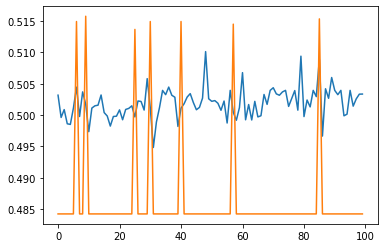

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

LSTM with GlobalMaxPooling1D

In [ ]:
def LSTM_nodrop():
  inp = Input(shape=[max_len])
  x = Embedding(max_words,50,input_length=max_len)(inp)
  for i in range(0,5):
    x = LSTM(256,return_sequences=True,dropout=0.2,recurrent_dropout=0)(x)
    x = LSTM(256,return_sequences=True,dropout=0.2,recurrent_dropout=0)(x)
  x = Dense(256, activation="relu")(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  return model

In [ ]:
model = LSTM_nodrop()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 150, 50)           500000    
_________________________________________________________________
lstm_72 (LSTM)               (None, 150, 256)          314368    
_________________________________________________________________
lstm_73 (LSTM)               (None, 150, 256)          525312    
_________________________________________________________________
lstm_74 (LSTM)               (None, 150, 256)          525312    
_________________________________________________________________
lstm_75 (LSTM)               (None, 150, 256)          525312    
_________________________________________________________________
lstm_76 (LSTM)               (None, 150, 256)        

In [ ]:
history = model.fit(sequences_matrix, Y,validation_split=0.2, batch_size=128, epochs=100)

Epoch 1/100
125/125 [==============================] - 40s 320ms/step - loss: 0.6959 - accuracy: 0.4988 - val_loss: 0.6930 - val_accuracy: 0.5155
Epoch 2/100
125/125 [==============================] - 36s 290ms/step - loss: 0.6987 - accuracy: 0.4999 - val_loss: 0.6929 - val_accuracy: 0.5134
Epoch 3/100
125/125 [==============================] - 37s 293ms/step - loss: 0.6947 - accuracy: 0.5133 - val_loss: 0.6941 - val_accuracy: 0.4872
Epoch 4/100
125/125 [==============================] - 37s 292ms/step - loss: 0.6944 - accuracy: 0.4999 - val_loss: 0.6939 - val_accuracy: 0.4845
Epoch 5/100
125/125 [==============================] - 37s 293ms/step - loss: 0.6941 - accuracy: 0.5018 - val_loss: 0.6930 - val_accuracy: 0.5157
Epoch 6/100
125/125 [==============================] - 37s 292ms/step - loss: 0.6933 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.4847
Epoch 7/100
125/125 [==============================] - 37s 292ms/step - loss: 0.6932 - accuracy: 0.5090 - val_loss: 0.6932 -

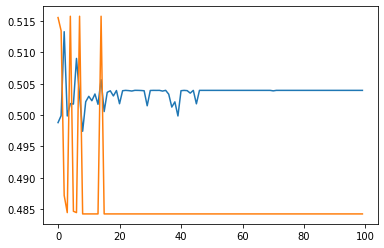

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

BiDirectional LSTM

In [ ]:
def BiDir_LSTM():
  inp = Input(shape=[max_len])
  x = Embedding(max_words,50,input_length=max_len)(inp)
  for i in range(0,5):
    x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25, recurrent_dropout=0))(x)
    x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25, recurrent_dropout=0))(x)
  x = GlobalMaxPool1D()(x)
  x = Dense(256, activation="relu")(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  return model

In [ ]:
model = BiDir_LSTM()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 150, 50)           500000    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 150, 512)          628736    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 150, 512)          1574912   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 150, 512)          1574912   
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 150, 512)          1574912   
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 150, 512)        

In [ ]:
history = model.fit(sequences_matrix, Y,validation_split=0.2, batch_size=128, epochs=100)

Epoch 1/100
125/125 [==============================] - 106s 851ms/step - loss: 0.7171 - accuracy: 0.4956 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 2/100
125/125 [==============================] - 100s 803ms/step - loss: 0.6940 - accuracy: 0.5066 - val_loss: 0.6938 - val_accuracy: 0.4843
Epoch 3/100
125/125 [==============================] - 100s 801ms/step - loss: 0.6937 - accuracy: 0.4988 - val_loss: 0.6938 - val_accuracy: 0.4843
Epoch 4/100
125/125 [==============================] - 100s 801ms/step - loss: 0.6938 - accuracy: 0.5006 - val_loss: 0.6935 - val_accuracy: 0.4843
Epoch 5/100
125/125 [==============================] - 100s 801ms/step - loss: 0.6937 - accuracy: 0.4980 - val_loss: 0.6949 - val_accuracy: 0.4843
Epoch 6/100
125/125 [==============================] - 100s 803ms/step - loss: 0.6934 - accuracy: 0.4999 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 7/100
125/125 [==============================] - 100s 801ms/step - loss: 0.7060 - accuracy: 0.5020 - val_loss: 0

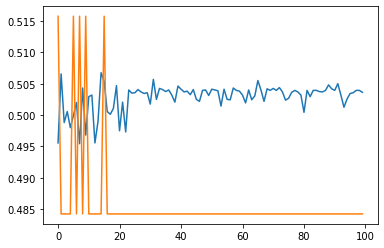

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

In [ ]:
def BiDir_LSTM_single_layer():
  inp = Input(shape=[max_len])
  x = Embedding(max_words,50,input_length=max_len)(inp)
  x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25, recurrent_dropout=0))(x)
  x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25, recurrent_dropout=0))(x)
  x = GlobalMaxPool1D()(x)
  x = Dense(256, activation="relu")(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  return model

In [ ]:
model = BiDir_LSTM_single_layer()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_16 (Embedding)     (None, 150, 50)           500000    
_________________________________________________________________
bidirectional_29 (Bidirectio (None, 150, 512)          628736    
_________________________________________________________________
bidirectional_30 (Bidirectio (None, 150, 512)          1574912   
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)             

In [ ]:
history = model.fit(sequences_matrix, Y,validation_split=0.2, batch_size=128, epochs=100)

Epoch 1/100
125/125 [==============================] - 18s 147ms/step - loss: 0.6271 - accuracy: 0.6932 - val_loss: 0.5129 - val_accuracy: 0.7588
Epoch 2/100
125/125 [==============================] - 17s 139ms/step - loss: 0.4869 - accuracy: 0.7773 - val_loss: 0.5149 - val_accuracy: 0.7563
Epoch 3/100
125/125 [==============================] - 17s 136ms/step - loss: 0.4243 - accuracy: 0.8143 - val_loss: 0.5033 - val_accuracy: 0.7520
Epoch 4/100
125/125 [==============================] - 17s 134ms/step - loss: 0.3764 - accuracy: 0.8369 - val_loss: 0.5377 - val_accuracy: 0.7510
Epoch 5/100
125/125 [==============================] - 17s 135ms/step - loss: 0.3379 - accuracy: 0.8544 - val_loss: 0.5765 - val_accuracy: 0.7628
Epoch 6/100
125/125 [==============================] - 17s 136ms/step - loss: 0.2967 - accuracy: 0.8750 - val_loss: 0.6045 - val_accuracy: 0.7517
Epoch 7/100
125/125 [==============================] - 17s 137ms/step - loss: 0.2552 - accuracy: 0.8931 - val_loss: 0.6137 -

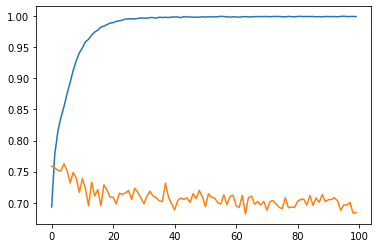

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

BiDirectional LSTM with regulariziers

In [ ]:
def BiDir_LSTM_regularization():
  inp = Input(shape=[max_len])
  x = Embedding(max_words,50,input_length=max_len)(inp)
  x = Bidirectional(LSTM(256,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01), return_sequences=True, dropout=0.25, recurrent_dropout=0))(x)
  x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25, recurrent_dropout=0))(x)
  x = GlobalMaxPool1D()(x)
  x = Dense(256, activation="relu")(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  return model

In [ ]:
model = BiDir_LSTM_regularization()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           500000    
_________________________________________________________________
bidirectional (Bidirectional (None, 150, 512)          628736    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 512)          1574912   
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)              

In [ ]:
history = model.fit(sequences_matrix, Y,validation_split=0.2, batch_size=128, epochs=10)

Epoch 1/10
125/125 [==============================] - 18s 141ms/step - loss: 5.8335 - accuracy: 0.7123 - val_loss: 4.3898 - val_accuracy: 0.7567
Epoch 2/10
125/125 [==============================] - 17s 133ms/step - loss: 3.8401 - accuracy: 0.7708 - val_loss: 3.3509 - val_accuracy: 0.7585
Epoch 3/10
125/125 [==============================] - 16s 132ms/step - loss: 2.8513 - accuracy: 0.8026 - val_loss: 2.4798 - val_accuracy: 0.7713
Epoch 4/10
125/125 [==============================] - 16s 132ms/step - loss: 2.0257 - accuracy: 0.8210 - val_loss: 1.8365 - val_accuracy: 0.7558
Epoch 5/10
125/125 [==============================] - 16s 132ms/step - loss: 1.3764 - accuracy: 0.8337 - val_loss: 1.2608 - val_accuracy: 0.7495
Epoch 6/10
125/125 [==============================] - 16s 132ms/step - loss: 0.8918 - accuracy: 0.8443 - val_loss: 0.8811 - val_accuracy: 0.7605
Epoch 7/10
125/125 [==============================] - 16s 132ms/step - loss: 0.5637 - accuracy: 0.8509 - val_loss: 0.6425 - val_ac

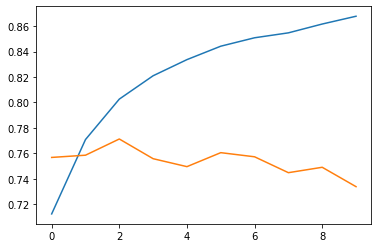

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

In [ ]:
def BiDir_LSTM_l1_regularization():
  inp = Input(shape=[max_len])
  x = Embedding(max_words,50,input_length=max_len)(inp)
  x = Bidirectional(LSTM(256,kernel_regularizer=l1(0.01),recurrent_regularizer=l1(0.01), bias_regularizer=l1(0.01), return_sequences=True, dropout=0.25, recurrent_dropout=0))(x)
  x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25, recurrent_dropout=0))(x)
  x = GlobalMaxPool1D()(x)
  x = Dense(256, activation="relu")(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  return model

In [ ]:
model = BiDir_LSTM_l1_regularization()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           500000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 150, 512)          628736    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 150, 512)          1574912   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [ ]:
history = model.fit(sequences_matrix, Y,validation_split=0.2, batch_size=128, epochs=10)

Epoch 1/10
125/125 [==============================] - 17s 135ms/step - loss: 28.5055 - accuracy: 0.6833 - val_loss: 8.1967 - val_accuracy: 0.7540
Epoch 2/10
125/125 [==============================] - 16s 128ms/step - loss: 7.8423 - accuracy: 0.7337 - val_loss: 7.4966 - val_accuracy: 0.7007
Epoch 3/10
125/125 [==============================] - 16s 129ms/step - loss: 7.1705 - accuracy: 0.7547 - val_loss: 6.8621 - val_accuracy: 0.7640
Epoch 4/10
125/125 [==============================] - 16s 131ms/step - loss: 6.5035 - accuracy: 0.7752 - val_loss: 6.1808 - val_accuracy: 0.7402
Epoch 5/10
125/125 [==============================] - 16s 131ms/step - loss: 5.8242 - accuracy: 0.7997 - val_loss: 5.5787 - val_accuracy: 0.7738
Epoch 6/10
125/125 [==============================] - 16s 131ms/step - loss: 5.1563 - accuracy: 0.8151 - val_loss: 4.8832 - val_accuracy: 0.7508
Epoch 7/10
125/125 [==============================] - 16s 131ms/step - loss: 4.4977 - accuracy: 0.8241 - val_loss: 4.3197 - val_a

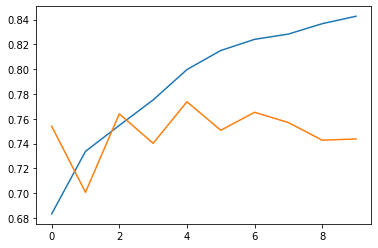

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()

In [ ]:
def BiDir_LSTM_l1_regularization2():
  inp = Input(shape=[max_len])
  x = Embedding(max_words,50,input_length=max_len)(inp)
  x = Bidirectional(LSTM(256,kernel_regularizer=l1(0.01),recurrent_regularizer=l1(0.01), bias_regularizer=l1(0.01), return_sequences=True, dropout=0.25, recurrent_dropout=0))(x)
  x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.25, recurrent_dropout=0))(x)
  x = GlobalMaxPool1D()(x)
  x = Dense(256,kernel_regularizer=regularizers.l2(0.01), activation="relu")(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation="sigmoid")(x)
  model = Model(inputs=inp, outputs=x)
  return model

In [ ]:
model = BiDir_LSTM_l1_regularization2()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 50)           500000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 150, 512)          628736    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 150, 512)          1574912   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [ ]:
history = model.fit(sequences_matrix, Y,validation_split=0.2, batch_size=128, epochs=10)

Epoch 1/10
125/125 [==============================] - 18s 140ms/step - loss: 28.9970 - accuracy: 0.5044 - val_loss: 8.2866 - val_accuracy: 0.4843
Epoch 2/10
125/125 [==============================] - 16s 132ms/step - loss: 7.9490 - accuracy: 0.4985 - val_loss: 7.5900 - val_accuracy: 0.4843
Epoch 3/10
125/125 [==============================] - 17s 132ms/step - loss: 7.3066 - accuracy: 0.5031 - val_loss: 7.0165 - val_accuracy: 0.4843
Epoch 4/10
125/125 [==============================] - 16s 132ms/step - loss: 6.6690 - accuracy: 0.5005 - val_loss: 6.3447 - val_accuracy: 0.4843
Epoch 5/10
125/125 [==============================] - 16s 132ms/step - loss: 6.0271 - accuracy: 0.5028 - val_loss: 5.7278 - val_accuracy: 0.4843
Epoch 6/10
125/125 [==============================] - 16s 132ms/step - loss: 5.3889 - accuracy: 0.5054 - val_loss: 5.0319 - val_accuracy: 0.5157
Epoch 7/10
125/125 [==============================] - 16s 132ms/step - loss: 4.7469 - accuracy: 0.5002 - val_loss: 4.4567 - val_a

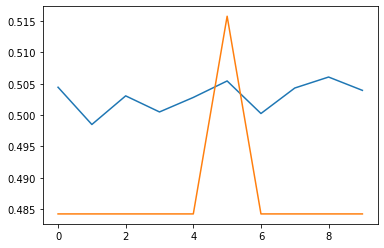

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.show()